In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.integrate import dblquad
from scipy.special import hyp0f1, gamma
from utilities import GetFermiSea

In [8]:
import matplotlib as mpl
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(16,12,12,12)

## Fitting

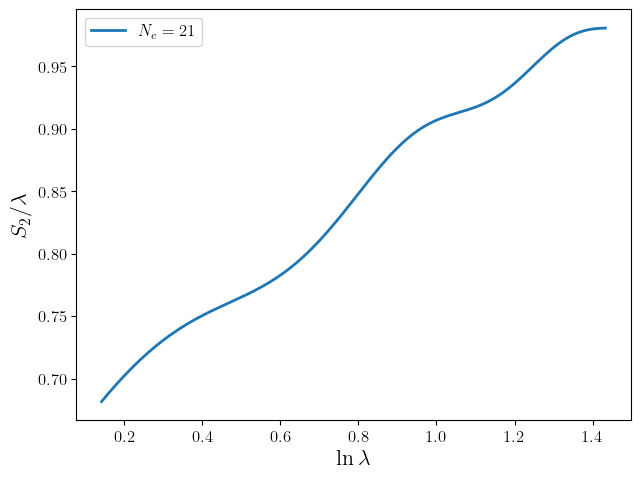

In [274]:
kFs = np.sqrt(np.array([5]))#,117, 350]))

for kF in kFs:
    Kxs, Kys = GetFermiSea(kF)

    Ne = len(Kxs)
    Ns = 2*Ne
    t = 1j

    Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
    Ly = Lx*np.imag(t)

    M = np.zeros((Ne,Ne), dtype=np.complex128)
    regions = np.exp(np.arange(-2.5, -1.2, 0.01))
    S = np.zeros(regions.size)
    for k in range(regions.size):
        for i in range(Ne):
            M[i,i] = np.pi*regions[k]*regions[k]
            for j in range(i+1,Ne):
                #M[i,j] = np.sinc(regions[k]*(Kxs[i]-Kxs[j]))*np.sinc(regions[k]*(Kys[i]-Kys[j]))*regions[k]*regions[k]
                M[i,j] =  np.pi*regions[k]*regions[k]*hyp0f1(2, -((Kxs[i]-Kxs[j])**2 + (Kys[i]-Kys[j])**2)*(regions[k]*np.pi)**2)/gamma(2)
                M[j,i] = M[i,j]
        e = np.linalg.eigvalsh(M)
        S[k] = -np.sum(np.log(e**2 + (1-e)**2))

    x = regions*np.sqrt(2*np.pi/Ns)*kF*Lx
    #print(f"{Ne} electrons: 10% at {np.log(0.252*np.sqrt(2*np.pi/Ns)*kF*Lx)}")
    plt.plot(np.log(x), S/x, label=f"$N_e = {Ne}$", linewidth=2)

    start = 20
    slopes = np.zeros(x.size-start)
    slopes_err = np.zeros(x.size-start)
    for end in range(start, x.size):
        popt, pcov = np.polyfit(np.log(x[:end]), S[:end]/x[:end], deg=1, cov=True)
        #print(popt[0], np.sqrt(pcov[0,0]))
        #plt.plot(np.log(x), popt[1]+np.log(x)*popt[0])
        slopes[end-start] = popt[0]
        slopes_err[end-start] = np.sqrt(pcov[0,0])
    #plt.scatter(np.log(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx), S[17]/(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx),marker='x')

plt.legend()
#plt.title("$S_2$ - free fermions")
plt.xlabel("$\\ln \\lambda$")
plt.ylabel("$S_{2}/\\lambda$")
plt.tight_layout(pad=0.5)

#plt.savefig('free fermions ED.pdf')#, dpi=400)

<ErrorbarContainer object of 3 artists>

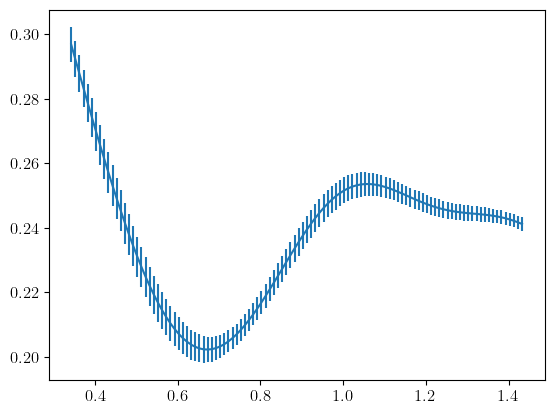

In [275]:
plt.errorbar(np.log(x[start:]), slopes, slopes_err)

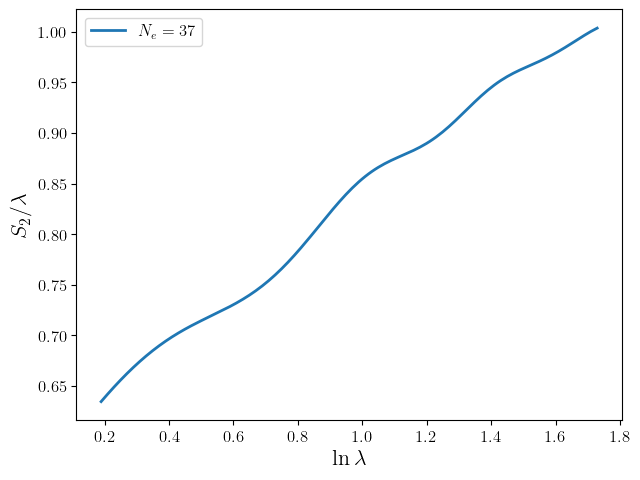

In [276]:
kFs = np.sqrt(np.array([10]))#,117, 350]))

for kF in kFs:
    Kxs, Kys = GetFermiSea(kF)

    Ne = len(Kxs)
    Ns = 2*Ne
    t = 1j

    Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
    Ly = Lx*np.imag(t)

    M = np.zeros((Ne,Ne), dtype=np.complex128)
    regions = np.exp(np.arange(-2.8, -1.25, 0.01))
    S = np.zeros(regions.size)
    for k in range(regions.size):
        for i in range(Ne):
            M[i,i] = np.pi*regions[k]*regions[k]
            for j in range(i+1,Ne):
                #M[i,j] = np.sinc(regions[k]*(Kxs[i]-Kxs[j]))*np.sinc(regions[k]*(Kys[i]-Kys[j]))*regions[k]*regions[k]
                M[i,j] =  np.pi*regions[k]*regions[k]*hyp0f1(2, -((Kxs[i]-Kxs[j])**2 + (Kys[i]-Kys[j])**2)*(regions[k]*np.pi)**2)/gamma(2)
                M[j,i] = M[i,j]
        e = np.linalg.eigvalsh(M)
        S[k] = -np.sum(np.log(e**2 + (1-e)**2))

    x = regions*np.sqrt(2*np.pi/Ns)*kF*Lx
    #print(f"{Ne} electrons: 10% at {np.log(0.252*np.sqrt(2*np.pi/Ns)*kF*Lx)}")
    plt.plot(np.log(x), S/x, label=f"$N_e = {Ne}$", linewidth=2)

    start = 20
    slopes = np.zeros(x.size-start)
    slopes_err = np.zeros(x.size-start)
    for end in range(start, x.size):
        popt, pcov = np.polyfit(np.log(x[:end]), S[:end]/x[:end], deg=1, cov=True)
        #print(popt[0], np.sqrt(pcov[0,0]))
        #plt.plot(np.log(x), popt[1]+np.log(x)*popt[0])
        slopes[end-start] = popt[0]
        slopes_err[end-start] = np.sqrt(pcov[0,0])
    #plt.scatter(np.log(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx), S[17]/(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx),marker='x')

plt.legend()
#plt.title("$S_2$ - free fermions")
plt.xlabel("$\\ln \\lambda$")
plt.ylabel("$S_{2}/\\lambda$")
plt.tight_layout(pad=0.5)

#plt.savefig('free fermions ED.pdf')#, dpi=400)

<ErrorbarContainer object of 3 artists>

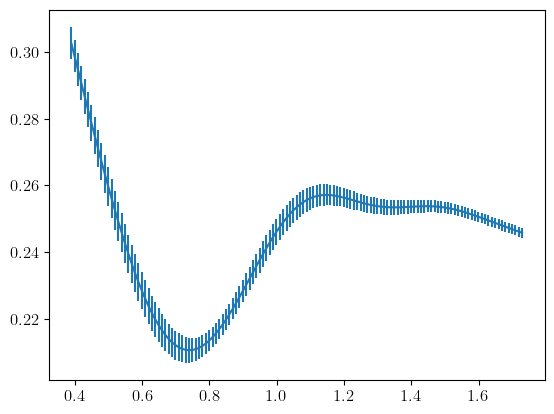

In [277]:
plt.errorbar(np.log(x[start:]), slopes, slopes_err)

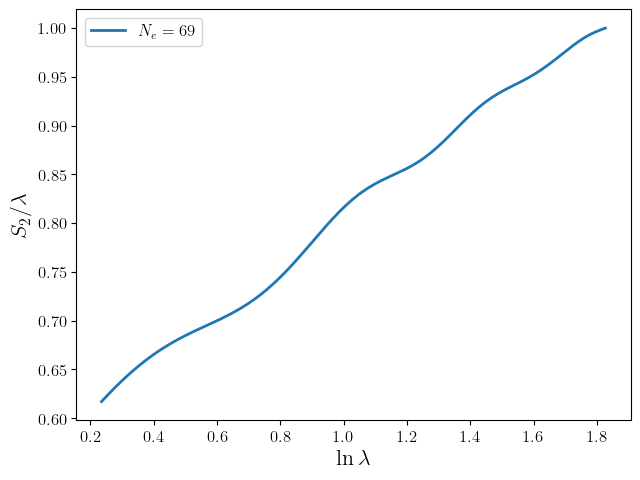

In [285]:
kFs = np.sqrt(np.array([20]))#,117, 350]))

for kF in kFs:
    Kxs, Kys = GetFermiSea(kF)

    Ne = len(Kxs)
    Ns = 2*Ne
    t = 1j

    Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
    Ly = Lx*np.imag(t)

    M = np.zeros((Ne,Ne), dtype=np.complex128)
    regions = np.exp(np.arange(-3.1, -1.5, 0.01))
    S = np.zeros(regions.size)
    for k in range(regions.size):
        for i in range(Ne):
            M[i,i] = np.pi*regions[k]*regions[k]
            for j in range(i+1,Ne):
                #M[i,j] = np.sinc(regions[k]*(Kxs[i]-Kxs[j]))*np.sinc(regions[k]*(Kys[i]-Kys[j]))*regions[k]*regions[k]
                M[i,j] =  np.pi*regions[k]*regions[k]*hyp0f1(2, -((Kxs[i]-Kxs[j])**2 + (Kys[i]-Kys[j])**2)*(regions[k]*np.pi)**2)/gamma(2)
                M[j,i] = M[i,j]
        e = np.linalg.eigvalsh(M)
        S[k] = -np.sum(np.log(e**2 + (1-e)**2))

    x = regions*np.sqrt(2*np.pi/Ns)*kF*Lx
    #print(f"{Ne} electrons: 10% at {np.log(0.252*np.sqrt(2*np.pi/Ns)*kF*Lx)}")
    plt.plot(np.log(x), S/x, label=f"$N_e = {Ne}$", linewidth=2)

    start = 20
    slopes = np.zeros(x.size-start)
    slopes_err = np.zeros(x.size-start)
    for end in range(start, x.size):
        popt, pcov = np.polyfit(np.log(x[:end]), S[:end]/x[:end], deg=1, cov=True)
        #print(popt[0], np.sqrt(pcov[0,0]))
        #plt.plot(np.log(x), popt[1]+np.log(x)*popt[0])
        slopes[end-start] = popt[0]
        slopes_err[end-start] = np.sqrt(pcov[0,0])
    #plt.scatter(np.log(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx), S[17]/(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx),marker='x')

plt.legend()
#plt.title("$S_2$ - free fermions")
plt.xlabel("$\\ln \\lambda$")
plt.ylabel("$S_{2}/\\lambda$")
plt.tight_layout(pad=0.5)

#plt.savefig('free fermions ED.pdf')#, dpi=400)

<ErrorbarContainer object of 3 artists>

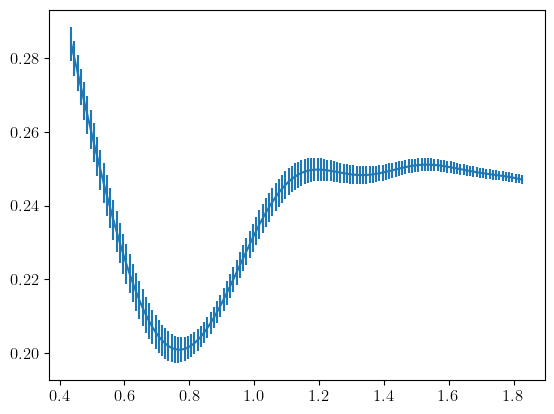

In [286]:
plt.errorbar(np.log(x[start:]), slopes, slopes_err)

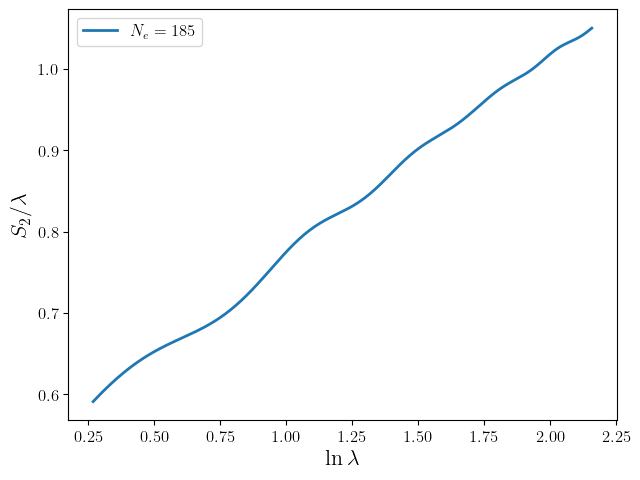

In [303]:
kFs = np.sqrt(np.array([58]))#,117, 350]))

for kF in kFs:
    Kxs, Kys = GetFermiSea(kF)

    Ne = len(Kxs)
    Ns = 2*Ne
    t = 1j

    Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
    Ly = Lx*np.imag(t)

    M = np.zeros((Ne,Ne), dtype=np.complex128)
    regions = np.exp(np.arange(-3.6, -1.7, 0.01))
    S = np.zeros(regions.size)
    for k in range(regions.size):
        for i in range(Ne):
            M[i,i] = np.pi*regions[k]*regions[k]
            for j in range(i+1,Ne):
                #M[i,j] = np.sinc(regions[k]*(Kxs[i]-Kxs[j]))*np.sinc(regions[k]*(Kys[i]-Kys[j]))*regions[k]*regions[k]
                M[i,j] =  np.pi*regions[k]*regions[k]*hyp0f1(2, -((Kxs[i]-Kxs[j])**2 + (Kys[i]-Kys[j])**2)*(regions[k]*np.pi)**2)/gamma(2)
                M[j,i] = M[i,j]
        e = np.linalg.eigvalsh(M)
        S[k] = -np.sum(np.log(e**2 + (1-e)**2))

    x = regions*np.sqrt(2*np.pi/Ns)*kF*Lx
    #print(f"{Ne} electrons: 10% at {np.log(0.252*np.sqrt(2*np.pi/Ns)*kF*Lx)}")
    plt.plot(np.log(x), S/x, label=f"$N_e = {Ne}$", linewidth=2)

    start = 80
    slopes = np.zeros(x.size-start)
    slopes_err = np.zeros(x.size-start)
    for end in range(start, x.size):
        popt, pcov = np.polyfit(np.log(x[:end]), S[:end]/x[:end], deg=1, cov=True)
        #print(popt[0], np.sqrt(pcov[0,0]))
        #plt.plot(np.log(x), popt[1]+np.log(x)*popt[0])
        slopes[end-start] = popt[0]
        slopes_err[end-start] = np.sqrt(pcov[0,0])
    #plt.scatter(np.log(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx), S[17]/(0.218*np.sqrt(2*np.pi/Ns)*kF*Lx),marker='x')

plt.legend()
#plt.title("$S_2$ - free fermions")
plt.xlabel("$\\ln \\lambda$")
plt.ylabel("$S_{2}/\\lambda$")
plt.tight_layout(pad=0.5)

#plt.savefig('free fermions ED.pdf')#, dpi=400)

<ErrorbarContainer object of 3 artists>

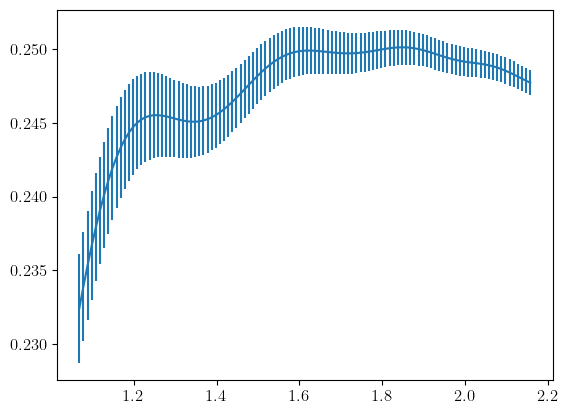

In [304]:
plt.errorbar(np.log(x[start:]), slopes, slopes_err)